In [1]:
!python -V

Python 3.9.12


In [15]:
!pip install xlrd

In [2]:
import pandas as pd
import numpy as np

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [6]:
import pyarrow

In [38]:
def read_dataframe(filename):
    df = pd.read_csv(filename, index_col=[0])

    df['duration'] = df['air_time']
    categorical = ['origin', 'dest']
    numerical = ['distance']

    df[categorical] = df[categorical].astype(str)
    
    df["origin"] = df["origin"].fillna(-1)
    df["dest"] = df["dest"].fillna(-1)
    df["distance"] = df["distance"].fillna(-1)
    df["duration"] = df["duration"].fillna(-1)
    return df

In [45]:
from sklearn.model_selection import train_test_split
df = read_dataframe('./data/flights.csv')
df_train, df_val = train_test_split(df, test_size=0.2)

In [46]:
len(df_train), len(df_val)

(269420, 67356)

In [47]:
df_train['orig_dest'] = df_train['origin'] + '_' + df_train['dest']
df_val['orig_dest'] = df_val['origin'] + '_' + df_val['dest']

In [48]:
categorical = ['orig_dest'] 
numerical = ['distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [49]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

25.198943467763435

In [51]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


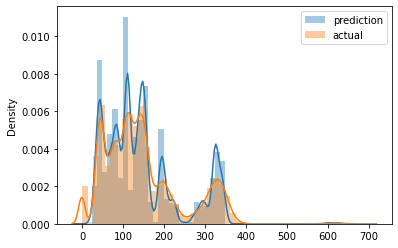

In [52]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()